### Исходная функция
_returns_ Таблицу значений функции в __n__ точках

In [5]:
import numpy as np


def f(n, flag):
    a = []
    b = []
    uzli = []
    if (flag):
        for k in range(n,0,-1):
            uzli.append(3 + 3 * np.cos((2*k+1) * np.pi / (2 * (n+1) ) ))
    else:
        uzli = np.linspace(0, 6, n)
    for x in uzli:
        a.append(x)
        b.append(np.exp(np.sin(x)))
    return list(zip(a, b))

In [16]:
f(6,1)

[(0.07521626345452859, 1.0780408446098084),
 (0.6545055525959116, 1.8381636342400722),
 (1.6983487826473258, 2.6962885296966874),
 (3.0, 1.151562836514535),
 (4.301651217352674, 0.39978575253759696),
 (5.345494447404089, 0.44655440188394707)]

### Интерполяция
_returns_ Значение функции в точке __x__, приближением Лагранжа по таблице значений __table__.

In [6]:
def pol_l(x, table):
    sum = 0
    for i in range(0, len(table)):
        member = table[i][1]  #y_i
        it_list = list(range(0, len(table)))
        it_list.remove(i)
        for j in it_list:
            member *= (x - table[j][0]) / (table[i][0] - table[j][0])
        sum += member
    return sum

_returns_ Значение функции в точке __x__, приближением Ньютона по таблице значений __table__ .

In [7]:
def FDiff(table):
    if (len(table) == 1):
        return table[0][1]
    if (len(table) == 2):
        return (table[1][1] - table[0][1]) / (table[1][0] - table[0][0])
    else:
        return (FDiff(table[1:]) - FDiff(table[:-1])) / (table[-1:][0][0] -
                                                         table[:1][0][0])


def W(x, n, table):
    mul = 1
    for i in range(0, n):
        mul *= (x - table[i][0])
    return mul


def pol_n(x, table):
    sum = 0
    for n in range(0,len(table)):
        sum += FDiff(table[:n+1])*W(x,n,table)
    return sum
def getCache_pol_n(table):
    cache = []
    for n in range(0,len(table)):
        cache.append(FDiff(table[:n+1]))
    return cache    
def pol_n_cached(x,table,cache):
    sum = 0
    for n in range(0,len(table)):
        sum += cache[n]*W(x,n,table)
    return sum

### Графики

<IPython.core.display.Javascript object>


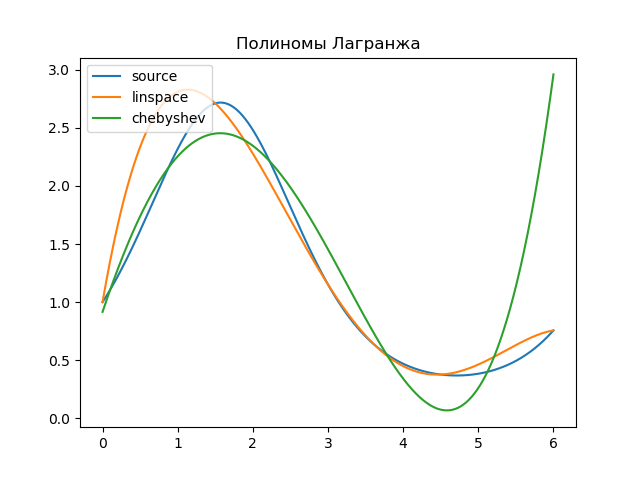

Text(0.5, 1.0, 'Полиномы Лагранжа')

In [35]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

rate = 14
x = np.linspace(0, 6, 1000)
source = np.exp(np.sin(x))
linsp = pol_l(x, f(rate, 0))
chebysh = pol_l(x,f(rate,1))
max_l = 0
max_c = 0
for i in range(0,1000):
    temp_l = source[i] - linsp[i]
    temp_c = source[i] - chebysh[i]
    if (max_l < temp_l):
        max_l = temp_l
    if (max_c < temp_c):
        max_c = temp_c
plt.plot(x, source, label="source")
plt.plot(x, linsp, label="linspace")
plt.plot(x, chebysh, label="chebyshev")
plt.legend(loc='upper left')
plt.title("Полиномы Лагранжа")





<IPython.core.display.Javascript object>


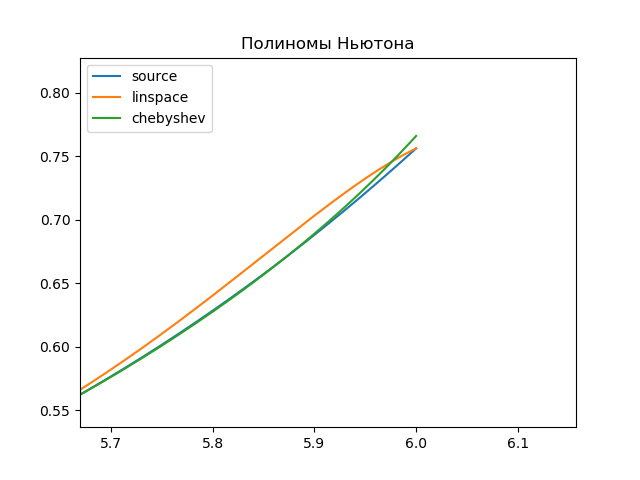

Text(0.5, 1.0, 'Полиномы Ньютона')

In [21]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt

rate = 15
x = np.linspace(0,6,1000)
plt.plot(x,np.exp(np.sin(x)), label = "source")
plt.plot(x,pol_n(x,f(rate,0)), label = "linspace")
plt.plot(x,pol_n(x,f(rate,1)), label = "chebyshev")
plt.legend(loc='upper left')
plt.title("Полиномы Ньютона")


### Расчёт погрешностей

In [ ]:
import sympy as sym
    
x = sym.Symbol('x')
f = sym.exp(sym.sin(x))
f5 = sym.diff(f, x, 5)
f5.subs(x, 10).evalf()

In [4]:
import numpy as np
import sympy as sym
def r_n(x, pol, table): #реальная погрешность 
    return abs(np.exp(np.sin(x)) - pol(x,table)) #hardcode..
def r_n_cached(x,pol,table,cache):
    return abs(np.exp(np.sin(x)) - pol(x,table,cache))
def Max(x,table):
    max = 0
    t = sym.Symbol('x')
    f = sym.exp(sym.sin(t))
    f_n = sym.diff(f, t, len(table) + 1)
    for i in np.linspace(0, 6, 1000):
        temp = abs(f_n.subs(t, i).evalf())
        if temp > max:
            max = temp
    return max         
def r_n_A(x,table): #оценочная погрешность
    return Max(x,table)*abs(W(x,len(table),table)) / np.math.factorial(len(table)+1)

In [15]:
import numpy as np


def G(flag):
    result = [(0,0),]
    for rate in range(2,27):
        print(rate)
        table = f(rate,flag)
        cache = getCache_pol_n(table)
        max_r = 0
        #max_a = 0 
        for x in np.linspace(0,6,1000):
            temp_r = r_n_cached(x,pol_n_cached,table,cache)
            #temp_a = r_n_A(x,f(rate))
            if temp_r > max_r:
                max_r = temp_r
            #if temp_a > max_a:
            #    max_a = temp_a
        result.append((rate, max_r))
    return result

In [20]:
import numpy as np
def L(flag):
    result = [(0,0),]
    for rate in range(2,27):
        print(rate)
        table = f(rate,flag)
        max_r = 0
        #max_a = 0 
        for x in np.linspace(0,6,1000):
            temp_r = r_n(x,pol_l,table)
            #temp_a = r_n_A(x,f(rate))
            if temp_r > max_r:
                max_r = temp_r
            #if temp_a > max_a:
            #    max_a = temp_a
        result.append((rate,max_r))
    return result    

2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


<IPython.core.display.Javascript object>


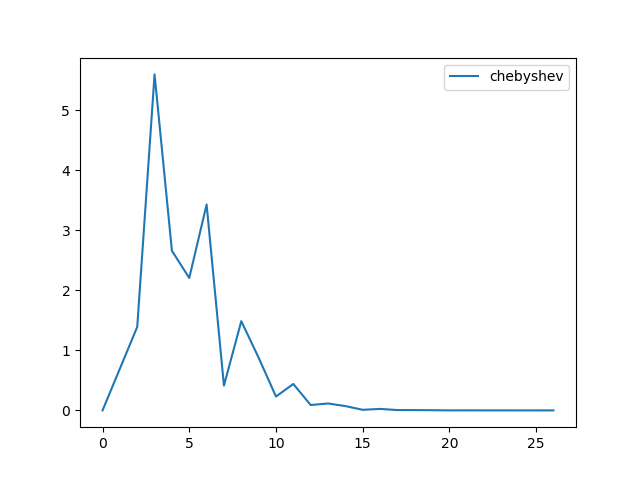

[0.00019135589018537402, 0.00015230715641489923, 8.922137611566683e-05, 9.003849493538496e-06, 2.245483960550132e-05]


In [23]:
%matplotlib notebook
%config InlineBackend.figure_format = 'svg'

import numpy as np
import matplotlib.pyplot as plt
rate = 15
x = np.linspace(0, 6, 1000)
#plt.plot(x,r_n(x,pol_l,f(rate)))
#plt.plot(x,r_n_A(x,f(rate)))
#res = G(0)
#x_l = [x[0] for x in res]
#y_l = [y[1] for y in res]
#plt.plot(x_l,y_l,label="linspace")

res = L(1)
x_l = [x[0] for x in res]
y_l = [y[1] for y in res]
plt.plot(x_l,y_l,label="chebyshev")
plt.legend()
print(y_l[-5:])

In [13]:
chebyshev = res

In [17]:
linspace = res

In [22]:
linsapce_L=res

In [24]:
chebyshev_L = res

In [32]:
chebyshev_y = [y[1] for y in chebyshev]
linspace_y = [y[1] for y in linspace]
linsapce_L_y = [y[1] for y in linsapce_L]
chebyshev_L_y = [y[1] for y in chebyshev_L]
table = list(zip(x_l,chebyshev_y,linspace_y,linsapce_L_y,chebyshev_L_y))

In [33]:
from IPython.display import HTML, display
import tabulate
display(HTML(tabulate.tabulate(table, tablefmt='html')))

0,0,0,0,0
2,1.38965,1.78241,1.78241,1.38965
3,5.59354,1.57111,1.57111,5.59354
4,2.65733,0.424479,0.424479,2.65733
5,2.20473,0.732036,0.732036,2.20473
6,3.42745,0.276462,0.276462,3.42745
7,0.412523,0.242895,0.242895,0.412523
8,1.48556,0.285179,0.285179,1.48556
9,0.87795,0.112007,0.112007,0.87795
10,0.231,0.133726,0.133726,0.231
11,0.43996,0.0951868,0.0951868,0.43996


In [4]:
import numpy as np
def G_m(rate):
    flag = 1
    print(rate)
    table = f(rate,flag)
    cache = getCache_pol_n(table)
    max_r = 0
    #max_a = 0 
    for x in np.linspace(0,6,1000):
        temp_r = r_n_cached(x,pol_n_cached,table,cache)
        #temp_a = r_n_A(x,f(rate))
        if temp_r > max_r:
            max_r = temp_r
        #if temp_a > max_a:
        #    max_a = temp_a
    return (rate,max_r)

In [ ]:
from multiprocessing import Pool as ThreadPool
rates = list(range(2,60))
pool = ThreadPool(12)
results = pool.map(G_m,rates)
pool.close()
#pool.join()
print(results)

24

6
5
3
8
10
9
7
12
14
16
13
11
18
20
22
15
17
24
26
28
30
32
34
36
38
19
40
42
21
44
23
46
25


In [17]:
%run defs.py
R_n(3)

NameError: name 'r_n' is not defined

_returns_ Мининмальную погрешность интерполяции функции от __a__ узлов до __b__ узлов.
В нашем случае лучший результат при __n = 36__

In [ ]:
import numpy as np


def test_l(a, b):
    min_r = 1000
    n = 0
    for rate in range(a, b):
        max_r = -1000
        for x in np.linspace(0, 6, 1000):
            temp = (np.exp(np.sin(x)) - pol_l(x, f(rate)))
            if max_r < temp:
                max_r = temp
        if min_r > max_r:
            min_r = max_r
            n = rate
    return (min_r, n)

In [ ]:
import sympy as sym
import nympy as np

def Max(rate):
    max = 0
    t = sym.Symbol('x')
    if rate in Max.f:
        f_n = Max.f.get(rate)
    else:
        for i in range(0,rate):
        f_n = sym.diff(f, t, 1)
    for i in np.linspace(0, 6, 1000):
        temp = abs(f_n.subs(t, i).evalf())
        if temp > max:
            max = temp
    return max
Max.f = {0:sym.exp(sym.sin(sym.Symbol('x')))}

def Error(rate):
    result = []
    #Оценка
    table = f(rate, 0)